In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [2]:

dateparse = lambda x: np.NaN if x == 'nan' else pd.datetime.strptime(x, '%H:%M')
accidents = pd.read_csv("input_data/accidents_2012_to_2014.csv", parse_dates=['Time'], date_parser=dateparse)
print("The number of rows in the dataset", accidents.shape)


#  Dropping the attributes I wont need
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location',
                'Longitude', 'Latitude', 'Police_Force', 'Accident_Index', '2nd_Road_Number',
                'Number_of_Casualties', 'Date', 'Local_Authority_(District)', '1st_Road_Number',
                'Local_Authority_(Highway)', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
               axis=1, inplace=True)

fatal_accidents = accidents[accidents['Accident_Severity'] == 1]
fatal_accidents.drop(['Accident_Severity'], axis=1, inplace=True)
del accidents



The number of rows in the dataset (464697, 33)


In [3]:
print("The number of fatal accidents", fatal_accidents.shape)
for col in fatal_accidents:
    fatal_accidents = fatal_accidents[fatal_accidents[col] != -1]
print("The number of row without missing values\n", fatal_accidents.shape)

print("Printing null values in the data", fatal_accidents.isnull().sum())


print("The number of fatal accidents", fatal_accidents.shape)
for col in fatal_accidents:
    fatal_accidents = fatal_accidents[fatal_accidents[col] != -1]

print(fatal_accidents.head())


The number of fatal accidents (5303, 17)
The number of row without missing values
 (1987, 17)
Printing null values in the data Number_of_Vehicles                            0
Day_of_Week                                   0
Time                                          0
1st_Road_Class                                0
Road_Type                                     0
Speed_limit                                   0
Junction_Detail                            1987
Junction_Control                              4
2nd_Road_Class                                0
Pedestrian_Crossing-Human_Control             0
Pedestrian_Crossing-Physical_Facilities       0
Light_Conditions                              0
Weather_Conditions                            0
Road_Surface_Conditions                       1
Special_Conditions_at_Site                    0
Carriageway_Hazards                           0
Urban_or_Rural_Area                           0
dtype: int64
The number of fatal accidents (1987, 17)
   

In [4]:

#  Drop Junction_Detail not value for fatal accident
fatal_accidents.drop(['Junction_Detail'], axis=1, inplace=True)

#Drop null values
fatal_accidents.dropna(inplace=True)
print("Printing null values in the data after removing Nan values\n", fatal_accidents.isnull().sum())

#fatal_accidents.drop(['Time'], axis=1, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fatal_accidents.describe(include='all'))


Printing null values in the data after removing Nan values
 Number_of_Vehicles                         0
Day_of_Week                                0
Time                                       0
1st_Road_Class                             0
Road_Type                                  0
Speed_limit                                0
Junction_Control                           0
2nd_Road_Class                             0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
dtype: int64
        Number_of_Vehicles  Day_of_Week                 Time  1st_Road_Class  \
count          1982.000000  1982.000000                 1982     1982.000000   
unique                 NaN          NaN        

In [5]:


fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')
rc = np.asarray(["_", 'Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified'])
fatal_accidents['2nd_Road_Class'] = rc[fatal_accidents['2nd_Road_Class'].values.astype('int32')]


In [6]:


fatal_accidents['2nd_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')
fatal_accidents['Speed_limit'] = fatal_accidents['Speed_limit'].astype('category')


In [7]:

fatal_accidents['1st_Road_Class'] = rc[fatal_accidents['1st_Road_Class'].values.astype('int32')]
fatal_accidents['1st_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')
fatal_accidents['Number_of_Vehicles'] = fatal_accidents['Number_of_Vehicles'].astype('category')
dw = np.asarray(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fatal_accidents['Day_of_Week'] = pd.cut(fatal_accidents['Day_of_Week'].values.astype('int32'), 
                                        [0,1,2,3,4,5,6,7], labels=dw, include_lowest=True)

fatal_accidents['Day_of_Week'] = fatal_accidents['Day_of_Week'].astype('category')

urb = np.asarray(['_', 'Urban Area', 'Rural Area'])
fatal_accidents['Urban_or_Rural_Area'] = urb[fatal_accidents['Urban_or_Rural_Area']]
fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fatal_accidents.describe(include='all'))

fatal_accidents.reset_index(drop=True, inplace=True)


        Number_of_Vehicles Day_of_Week                 Time 1st_Road_Class  \
count               1982.0        1982                 1982           1982   
unique                 9.0           7                  806              6   
top                    1.0    Saturday  1900-01-01 15:00:00   Unclassified   
freq                 883.0         337                   16           1414   
first                  NaN         NaN  1900-01-01 00:01:00            NaN   
last                   NaN         NaN  1900-01-01 23:58:00            NaN   

                 Road_Type  Speed_limit         Junction_Control  \
count                 1982       1982.0                     1982   
unique                   6          6.0                        4   
top     Single carriageway         30.0  Giveway or uncontrolled   
freq                  1602       1122.0                     1667   
first                  NaN          NaN                      NaN   
last                   NaN          NaN      

In [8]:
from prometheus_client import values
date_time = pd.to_datetime(fatal_accidents['Time'])
hours = []
for t in date_time:
    hours.append(t.hour)

date_time = pd.Series(data=hours)
print(date_time.head(15))
date_time = pd.cut(date_time, [0, 5.9, 11.9, 17.9, 23.9], labels=['early_morning', 
                                              'morning', 'afternoon', 'evening'],
       include_lowest=True)
print(date_time.head(15))


0     13
1      0
2     12
3     12
4      7
5      6
6     18
7     23
8     14
9     17
10    19
11     9
12    10
13    19
14    20
dtype: int64
0         afternoon
1     early_morning
2         afternoon
3         afternoon
4           morning
5           morning
6           evening
7           evening
8         afternoon
9         afternoon
10          evening
11          morning
12          morning
13          evening
14          evening
dtype: category
Categories (4, object): [early_morning < morning < afternoon < evening]


In [9]:

fatal_accidents['Time'] = date_time


  Number_of_Vehicles Day_of_Week           Time 1st_Road_Class  \
0                  2    Saturday      afternoon              A   
1                  1      Sunday  early_morning   Unclassified   
2                  1   Wednesday      afternoon   Unclassified   
3                  1     Tuesday      afternoon   Unclassified   
4                  1    Thursday        morning   Unclassified   

            Road_Type Speed_limit          Junction_Control 2nd_Road_Class  \
0  Single carriageway          30  Automatic traffic signal              A   
1      One way street          30   Giveway or uncontrolled   Unclassified   
2  Single carriageway          30   Giveway or uncontrolled   Unclassified   
3  Single carriageway          30   Giveway or uncontrolled   Unclassified   
4  Single carriageway          30   Giveway or uncontrolled   Unclassified   

  Pedestrian_Crossing-Human_Control  \
0             None within 50 metres   
1             None within 50 metres   
2             Non

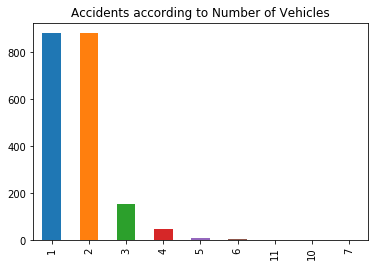

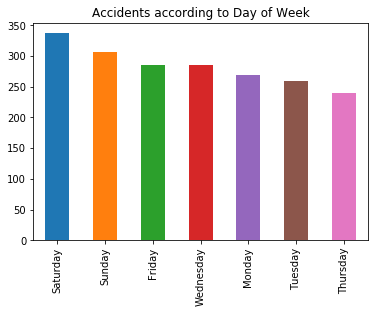

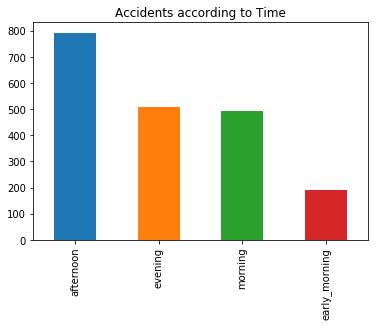

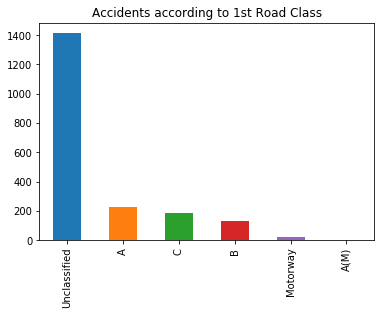

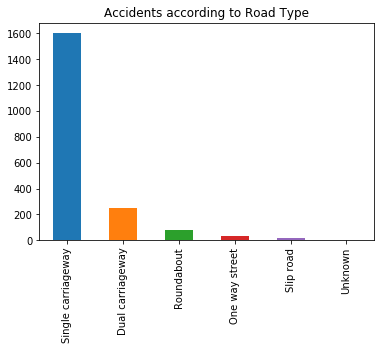

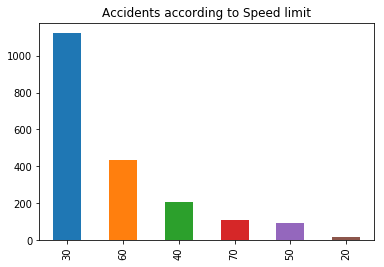

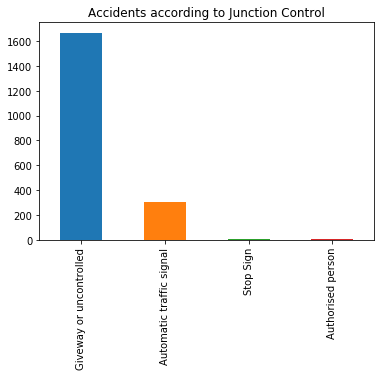

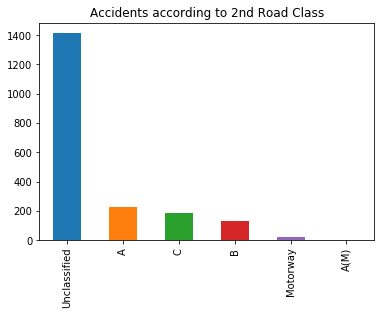

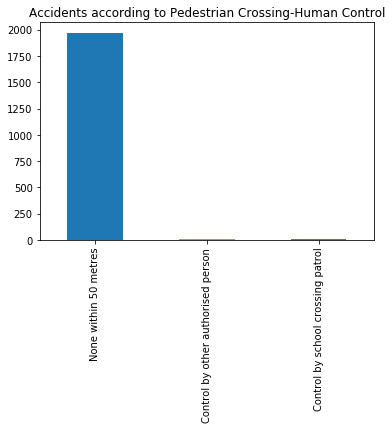

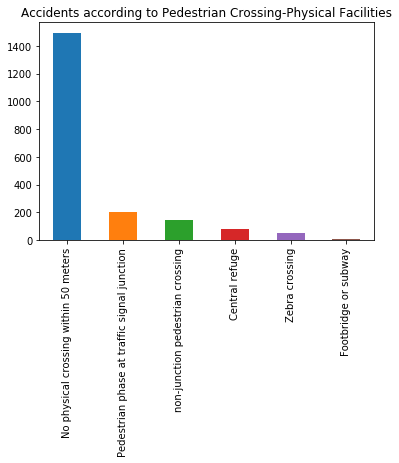

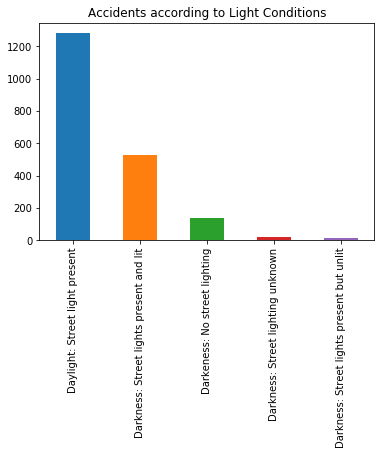

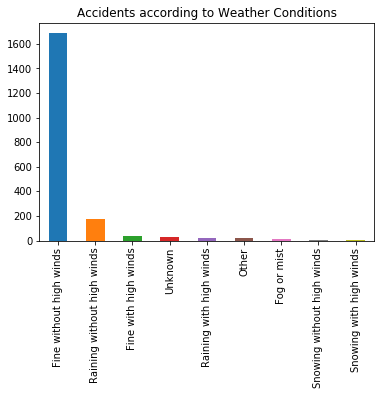

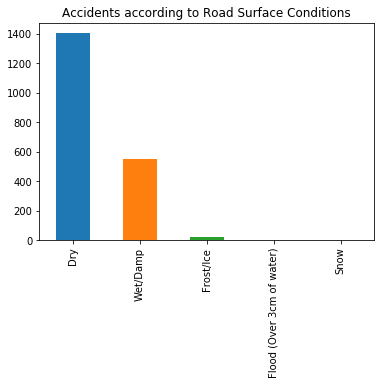

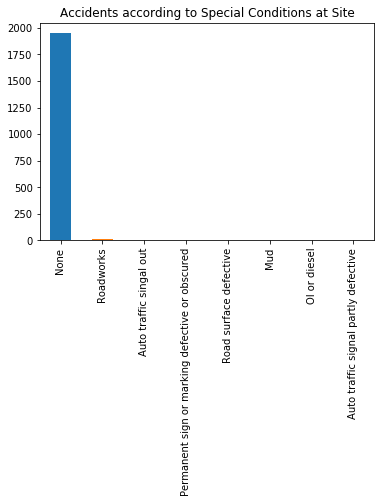

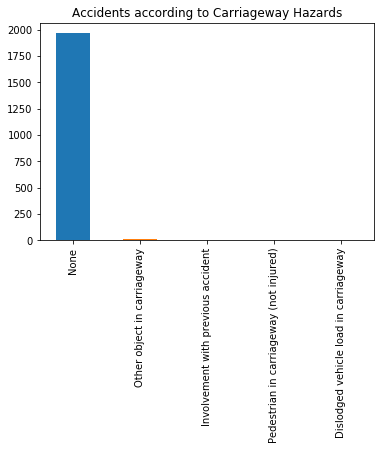

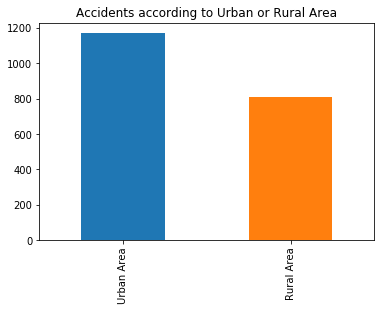

In [10]:

print(fatal_accidents.head(5))

for i, att in enumerate(fatal_accidents):
    if att == 'Speed_limit':
        plt.figure(i)
        fatal_accidents[att].value_counts().plot(kind='bar', title="Accidents according to "+" ".join(att.split('_')))
        plt.savefig('figures/plot_%s.png'%att, bbox_inches='tight')


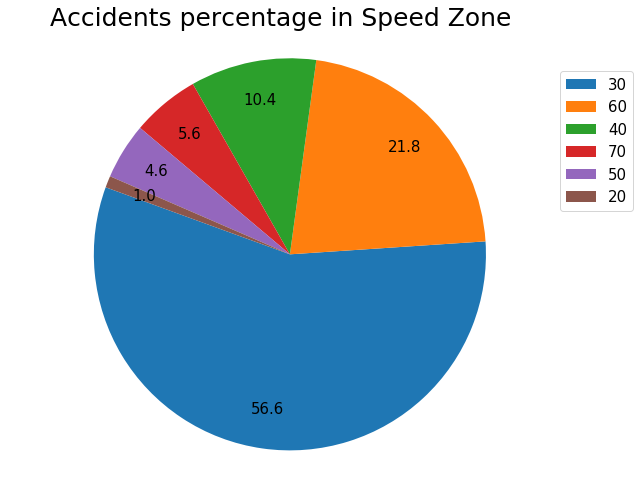

In [11]:
speed = fatal_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
plt.figure(figsize=(10, 8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f', pctdistance=0.8, labeldistance=1.9, explode=explode, shadow=False, startangle=160,textprops={'fontsize': 15})

plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5, .9, 'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.savefig('figures/plot_Speed_limit.png', bbox_inches='tight')

In [14]:
fatal_accidents.to_csv('output_data/preprocessed_fatal_accidents.csv', index=False, sep=',')